<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/CNN_Examples/LeNet_MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement the LeNet architecture for classification of CIFAR10 data.

In [1]:
# import libraries
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from keras.src.optimizers import SGD
from keras.src.layers import Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard


In [2]:
# Load the CIFAR10 dataset using the cifar10.load_data() function.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize the pixel values to the range [0, 1] using the astype() method.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [4]:
# Convert the labels to one-hot encoding using the to_categorical() function.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [5]:
# Define the class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [6]:
# Define the LeNet model architecture using the Sequential() function and 
# add convolutional, average pooling, and dense layers using the 
# Conv2D(), AveragePooling2D(), Flatten(), and Dense() functions.
model = Sequential([
    Conv2D(6, 5, padding='valid', activation = 'tanh', input_shape=(32,32,3)),
    AveragePooling2D(2),
    Activation('sigmoid'),
    Conv2D(16, 5, padding='valid', activation = 'tanh'),
    AveragePooling2D(2),
    Activation('sigmoid'),
    Flatten(),
    Dense(120, activation = 'tanh'),
    Dense(84, activation = 'tanh'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [7]:
# Compile the model using the compile() method and 
# specify the optimizer, loss function, and metrics to use during training.
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])


/Library/anaconda3/envs/deepLearningClass/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
# Train the model using the fit() method and specify the number of epochs to train for and the batch size to use.
# model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

model.fit(x_train, y_train,
            batch_size=64,
            epochs=60,
            validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/60
782/782 [==============================] - 6s 7ms/step - loss: 2.3208 - accuracy: 0.1031 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 2/60
782/782 [==============================] - 5s 6ms/step - loss: 2.0844 - accuracy: 0.2207 - val_loss: 2.0000 - val_accuracy: 0.2638
Epoch 3/60
782/782 [==============================] - 5s 6ms/step - loss: 1.9678 - accuracy: 0.2684 - val_loss: 1.8807 - val_accuracy: 0.3102
Epoch 4/60
782/782 [==============================] - 5s 6ms/step - loss: 1.8410 - accuracy: 0.3275 - val_loss: 1.8052 - val_accuracy: 0.3386
Epoch 5/60
782/782 [==============================] - 5s 6ms/step - loss: 1.7668 - accuracy: 0.3556 - val_loss: 1.7103 - val_accuracy: 0.3753
Epoch 6/60
782/782 [==============================] - 5s 6ms/step - loss: 1.7067 - accuracy: 0.3774 - val_loss: 1.6437 - val_accuracy: 0.4004
Epoch 7/60
782/782 [==============================] - 5s 6ms/step - loss: 1.6724 - accuracy: 0.3899 - val_loss: 1.6340 - val_accuracy: 0.3963
Epoch 

In [9]:
# save model
model.save('LeNet_CIFAR10.h5')

/Library/anaconda3/envs/deepLearningClass/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# Evaluate the model on the test set using the evaluate() method and print the test accuracy.
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 1.2143 - accuracy: 0.5703
Test Loss:  1.2142963409423828
Test Accuracy: 0.5702999830245972


1/1 [==============================] - 0s 67ms/step


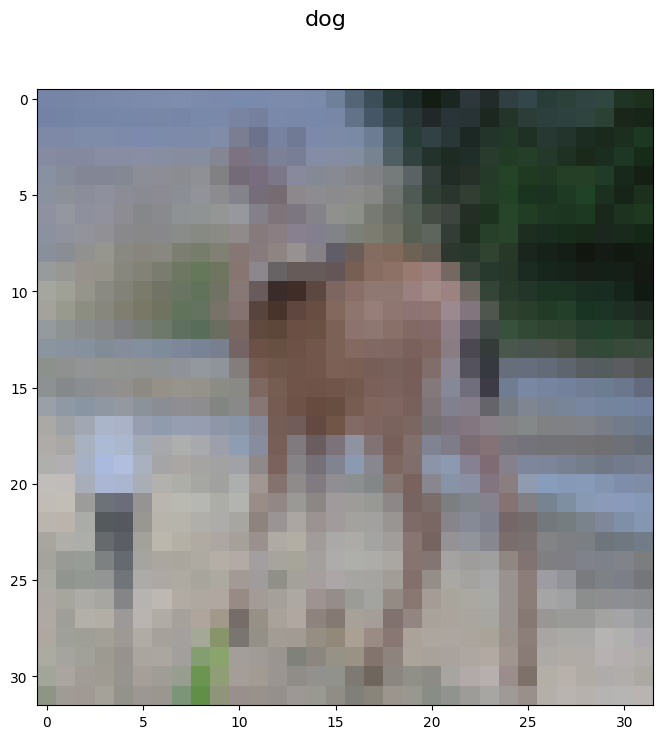

In [11]:
# One image prediction
image_index = 100
pred = model.predict(x_test[image_index,::].reshape(1, 32, 32, 3))
    
#im = np.transpose(x_test[image_index,::], (1, 2, 0))
im = x_test[image_index,::]

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle(class_names[np.argmax(pred)], fontsize=16)
plt.imshow(im)

313/313 [==============================] - 1s 2ms/step


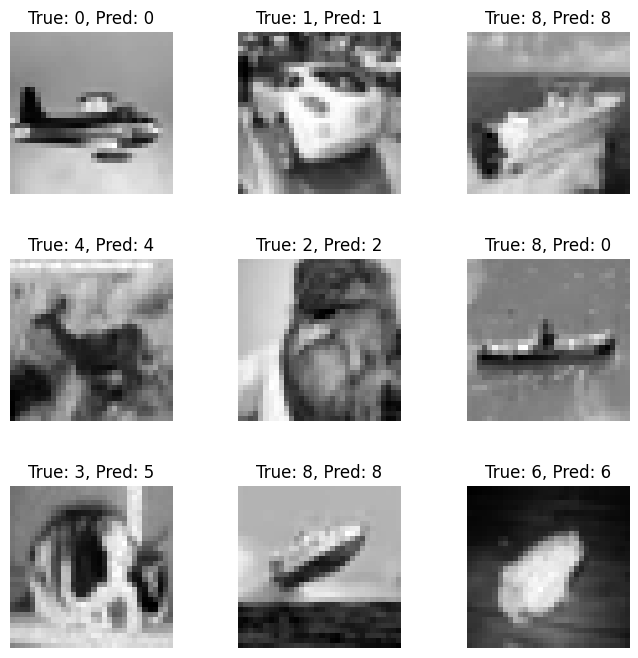

In [12]:
# Display a few example plots of test results
# Get the predicted labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Display a few example plots of test results
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx, :, :, 0], cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}, Pred: {y_pred[idx]}")
    axs[i].axis("off")
plt.show()
